In [99]:
import pandas as pd
import sqlite3

## connection to the database

In [100]:
con = sqlite3.connect("../data/checking-logs.sqlite")

 ##  datetime from the pageviews table

In [101]:
df = pd.io.sql.read_sql(
    sql="SELECT timestamp FROM checker WHERE uid LIKE 'user_%'", 
    parse_dates=['timestamp'],
    con=con
)

##  analyze commits

In [102]:
df['day_type'] = df['timestamp'].dt.dayofweek.apply(lambda x: 'weekend' if x > 4 else 'working_day')
a_df = df.groupby([df['day_type'], df['timestamp'].dt.hour, df['timestamp'].dt.date]).count()
a_df.rename(columns={'timestamp': 'count'}, inplace=True)
a_df = a_df.groupby(level=['day_type', 'timestamp']).mean().swaplevel(i=0, j=1).unstack().droplevel(0, axis='columns')
a_df.index.name = 'hour'
a_df.fillna(0, inplace=True)
for hour in range(0, 24):
    if hour not in a_df.index.values:
        a_df.loc[hour] = [0, 0]
a_df.sort_index(inplace=True)


array([<AxesSubplot: title={'center': 'weekend'}, xlabel='hour'>,
       <AxesSubplot: title={'center': 'working_day'}, xlabel='hour'>],
      dtype=object)

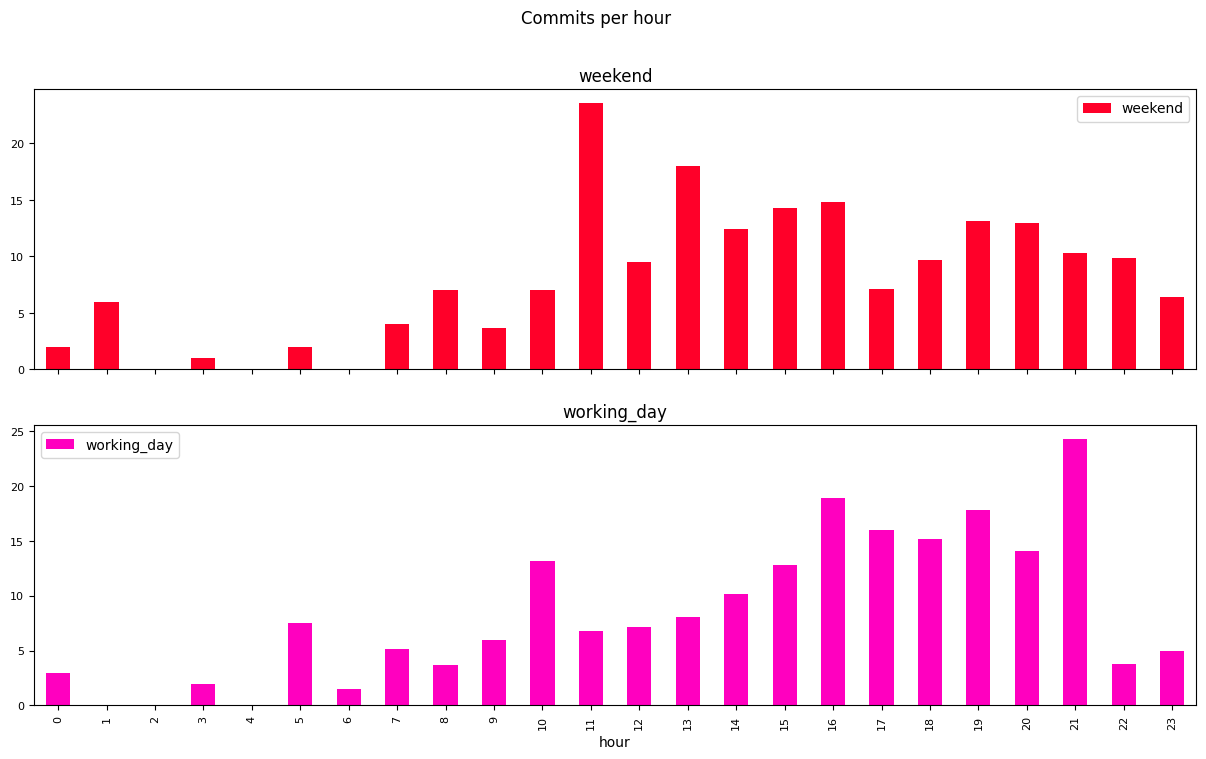

In [103]:
a_df.plot.bar(
    colormap='gist_rainbow', fontsize=8, figsize=(15,8), title='Commits per hour', subplots=True, sharex=True,
)

## Close connection

In [104]:
con.close()

## Is the dynamic different on working days and weekends?

Yes, max commits at 21 on working days and at 11 on the weekend.